In [16]:
import sys
sys.path.append('../src')
from semantic_bac_segment.data_loader import BacSegmentDataset, collate_fn
from semantic_bac_segment.pre_processing import ImageAdapter

image_dir='../data/source_norm2'
mask_dir= '../data/multiclass_masks'


patch_size=512
overlap_ratio=0

In [17]:
import os

files = os.listdir(image_dir)
print(files)


['coli_mask_frame_205.tiff', 'img_6.tiff', 'mabs_img_13.tiff', 'mabs_img_4.tiff', 'mabs_img_8.tiff', 'coli_mask_frame_1.tiff', 'coli_mask_frame_232.tiff', '.DS_Store', 'mabs_img_9.tiff', 'coli_mask_frame_101.tiff', 'mabs_img_5.tiff', 'img_7.tiff', 'mabs_img_12.tiff', 'coli_mask_frame_223.tiff', 'coli_mask_frame_274.tiff', 'mabs_img_2.tiff', 'mabs_img_3.tiff', 'mabs_img_14.tiff', 'coli_mask_frame_166.tiff', 'img_10.tiff', 'coli_mask_frame_10.tiff', 'coli_mask_frame_165.tiff', 'mabs_img_1.tiff', 'coli_mask_frame_109.tiff', 'mabs_img_6.tiff', 'mabs_img_11.tiff', 'img_8.tiff', 'img_9.tiff', 'coli_mask_frame_56.tiff', 'mabs_img_10.tiff', 'img_5.tiff', 'mabs_img_7.tiff']


In [111]:
import tifffile
img = tifffile.imread(os.path.join(image_dir, 'img_10.tiff'))
mask = tifffile.imread(os.path.join(mask_dir, 'img_10.tiff'))

prepare_img = ImageAdapter(img, patch_size, overlap_ratio)
prepare_mask = ImageAdapter(mask, patch_size, overlap_ratio)
img_patches = prepare_img.create_patches()
mask_patches = prepare_mask.create_patches()


In [112]:
print(f'shape img: {img.shape}')
print(f'shape mask: {mask.shape}')

shape img: (1608, 1608)
shape mask: (3, 1608, 2400)


In [99]:
mask_patches=mask_patches/255

In [100]:
mask_patches

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0.

In [101]:
def convert_to_categorical_stack(mask_patches):
    # Create a new array with the same shape as mask_patches
    flattened_stack = np.zeros_like(mask_patches)

    # Iterate over each channel and assign values based on the position
    for c in range(mask_patches.shape[1]):
        flattened_stack[:, c, :, :] = (c + 1) * mask_patches[:, c, :, :]

    # Flatten the stack on the channel axis
    flattened_stack = np.max(flattened_stack, axis=1)

    return flattened_stack

In [102]:
import numpy as np

# Create a new array with the same shape as multi_class_stack_array
flattened_stack = convert_to_categorical_stack(mask_patches)

In [103]:
mask_patches=mask_patches*2

In [104]:
flattened_stack = np.argmax(mask_patches, axis=1) + 1

In [108]:
img_patches.shape

(25, 512, 512)

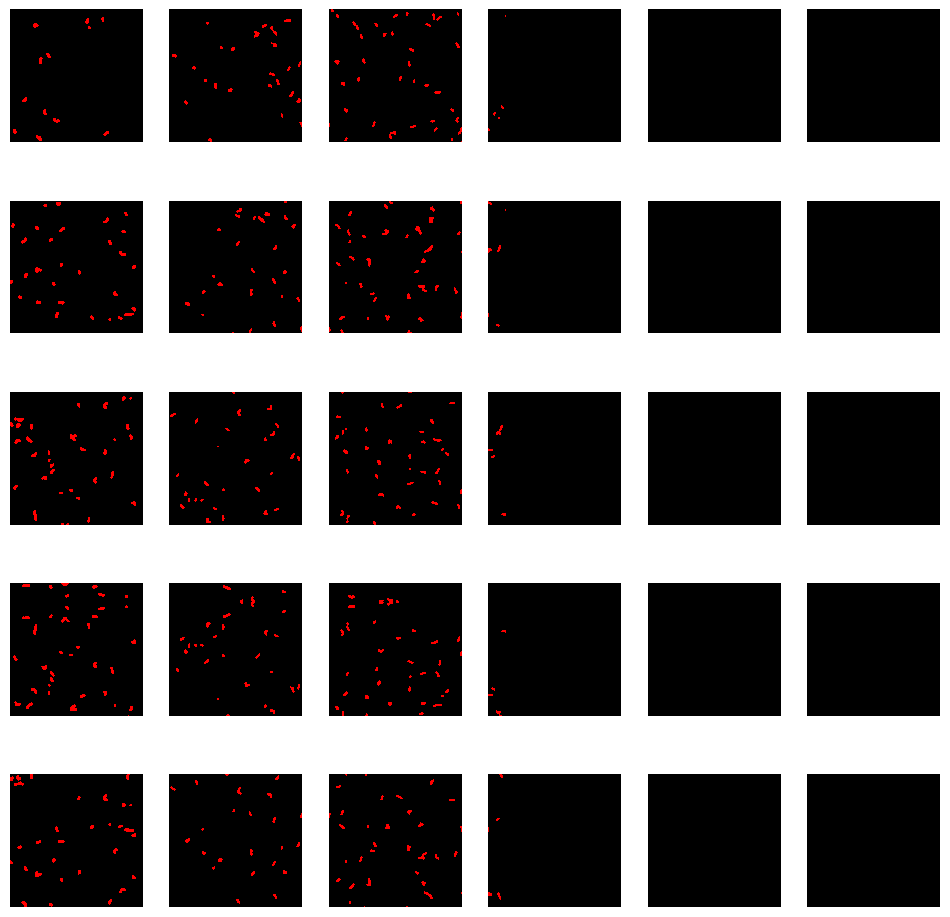

In [106]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

rows = 5
cols = 6
figsize = (12, 12)  # Increase the figure size

# Create a custom colormap with categorical colors
cmap = ListedColormap(['black', 'red', 'yellow', 'green', 'purple', 'orange'])

fig, axs = plt.subplots(rows, cols, figsize=figsize)

for idx, img in enumerate(flattened_stack):
    axs[idx // cols, idx % cols].imshow(img, cmap=cmap, vmin=1, vmax=len(cmap.colors))
    axs[idx // cols, idx % cols].axis('off')

plt.show()

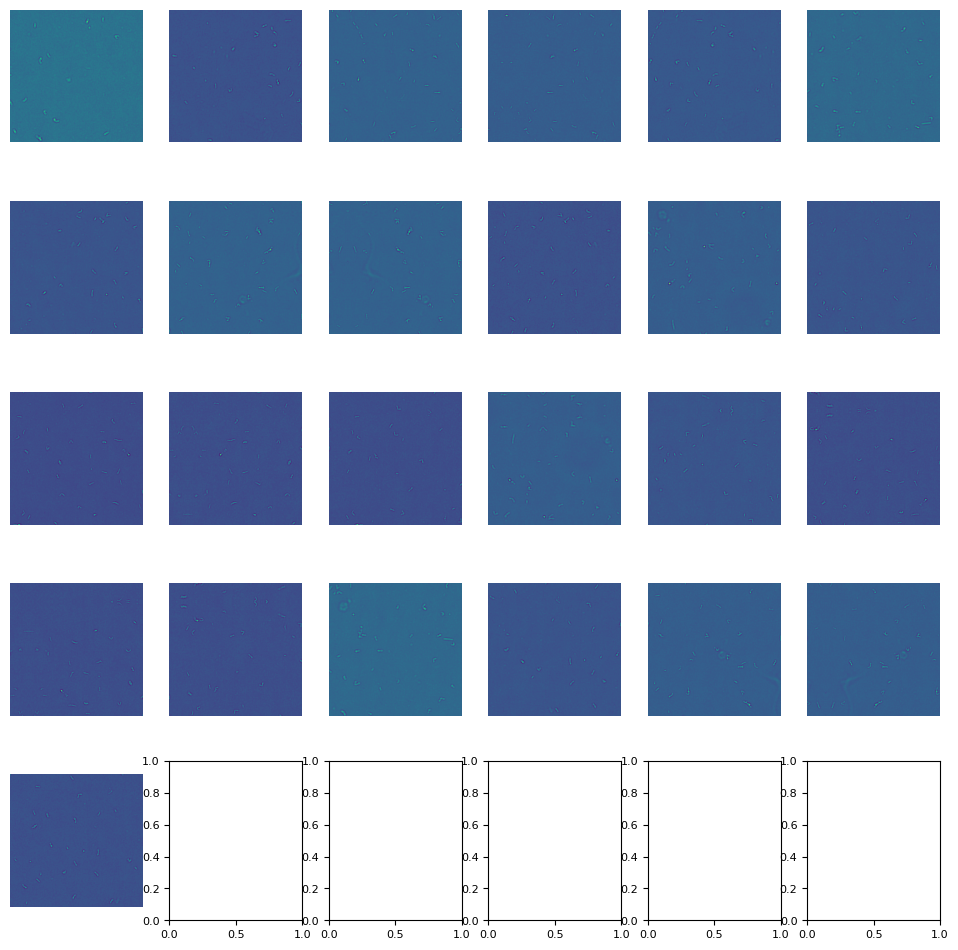

In [107]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

figsize = (12, 12)  # Increase the figure size

# Create a custom colormap with categorical colors

fig, axs = plt.subplots(rows, cols, figsize=figsize)

for idx, img in enumerate(img_patches):
    axs[idx // cols, idx % cols].imshow(img, cmap='viridis')
    axs[idx // cols, idx % cols].axis('off')

plt.show()